# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [3]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv'	

df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [4]:
print(df.shape[0], 'rows in this dataset')

715369 rows in this dataset


How many North Atlantic hurricanes are in this dataset?

In [6]:
print(len(df['BASIN'] == 'NA'), 'North Atlantic hurricanes in this dataset')


715369 North Atlantic hurricanes in this dataset


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [7]:
print("BASIN:", df['BASIN'].unique())

BASIN: ['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']


In [8]:
print("SUBBASIN:", df['SUBBASIN'].unique())

SUBBASIN: ['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']


In [9]:
print("NATURE:", df['NATURE'].unique())

NATURE: ['NR' 'TS' 'ET' 'MX' 'SS' 'DS']


### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [18]:
df = df.rename(columns={
    'WMO_WIND': 'WIND',
    'WMO_PRES': 'PRES'
})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [19]:
top_10_WIND = df['WIND'].nlargest(10)
print('10 largest wind level are')
print(top_10_WIND)

10 largest wind level are
659500    185.0
659498    180.0
659502    180.0
421314    165.0
175297    160.0
175298    160.0
175300    160.0
475876    160.0
545771    160.0
599105    160.0
Name: WIND, dtype: float64


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [20]:
hurricanes_by_wind = df.groupby(['SID'])['WIND'].max().nlargest(10)
hurricanes_by_wind

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

Text(0.5, 1.0, 'Wind speed of the 20 strongest-wind hurricanes')

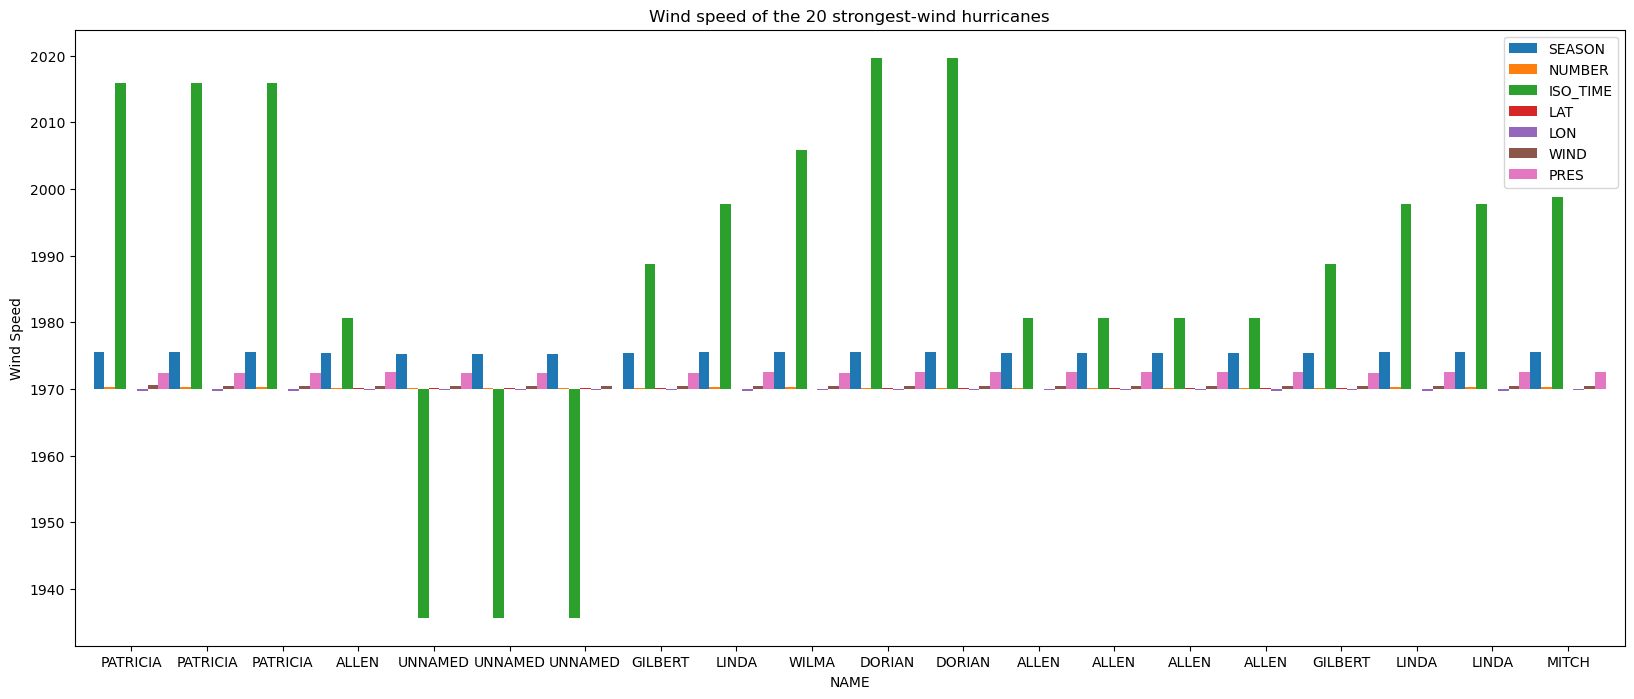

In [21]:
df.nlargest(20, 'WIND').plot(figsize=(20, 8), kind='bar', width=1, rot=0, x='NAME', ylabel='Wind Speed')
plt.title('Wind speed of the 20 strongest-wind hurricanes') ##why there are minus

### 6) Plot the count of all datapoints by Basin

as a bar chart

<Axes: title={'center': 'Count of Hurricanes by Basin'}, xlabel='BASIN'>

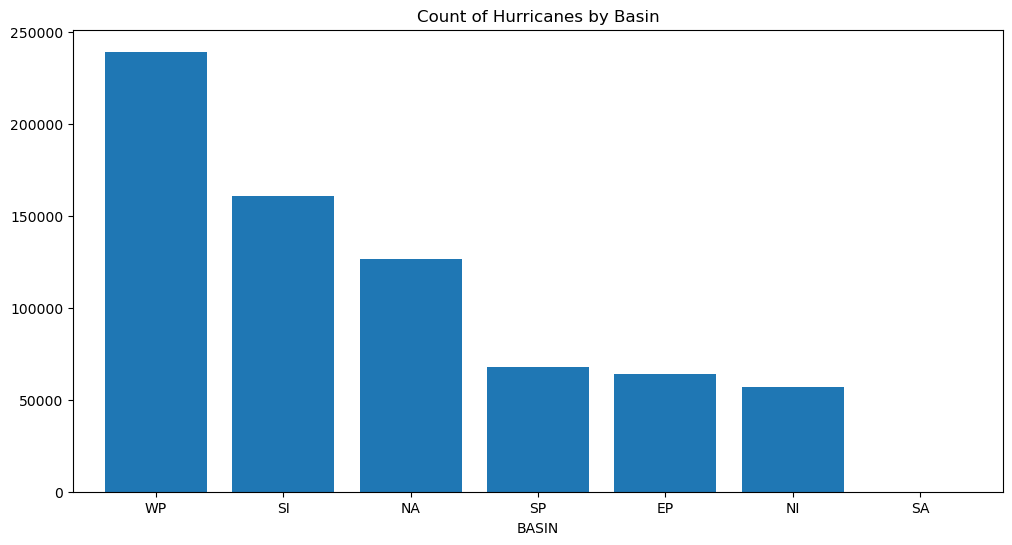

In [43]:
df['BASIN'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.8, rot=0, title = 'Count of Hurricanes by Basin')

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

<Axes: title={'center': 'Count of Unique Hurricanes by Basin'}, xlabel='BASIN'>

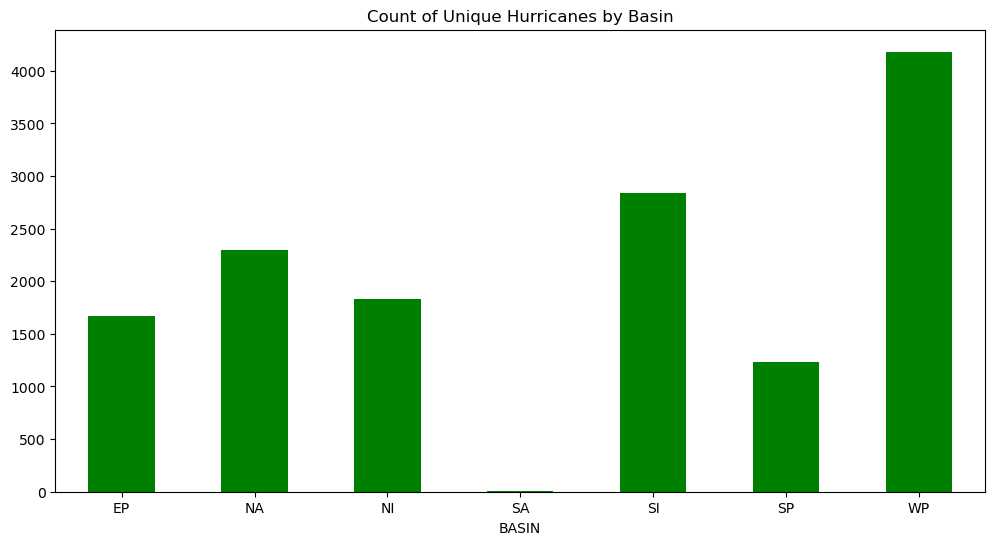

In [42]:
df.groupby('BASIN')['SID'].nunique().plot(kind='bar', figsize=(12,6), rot=0, color='green', title='Count of Unique Hurricanes by Basin')

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

Text(0, 0.5, 'Latitude')

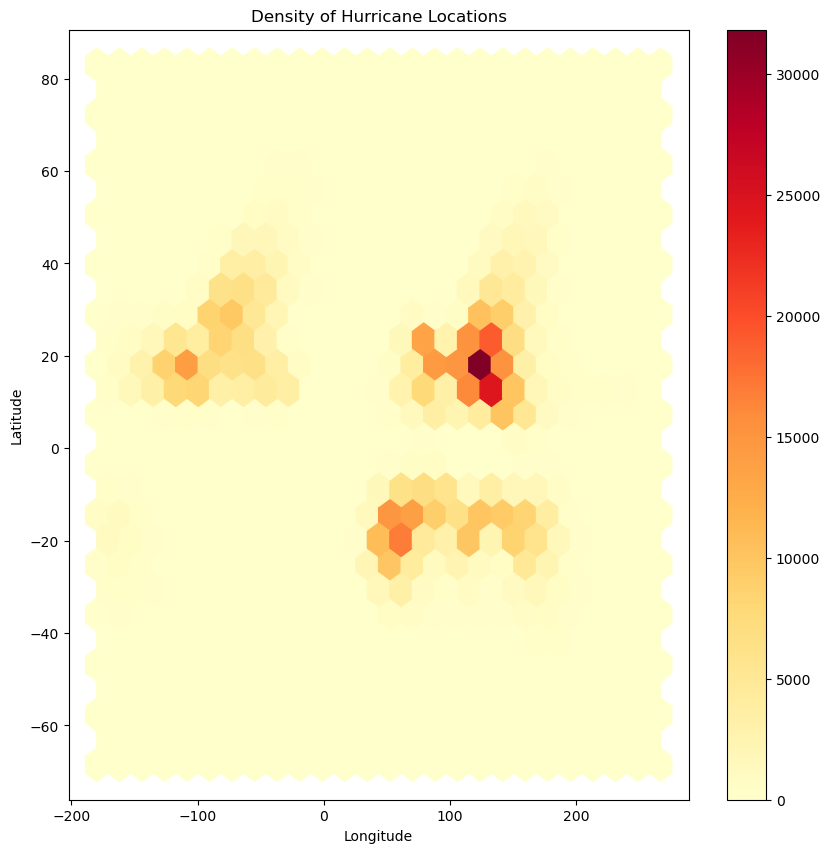

In [22]:
plt.figure(figsize=(10, 10))
plt.hexbin(df['LON'], df['LAT'], gridsize=25,cmap='YlOrRd')  
plt.colorbar()
plt.title('Density of Hurricane Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [23]:
katrina = df[(df['NAME'] == 'KATRINA') & (df['SEASON'] >= 2005)]
katrina

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
597104,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1,-75.1,30.0,1008.0
597105,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2,-75.4,NaN,NaN
597106,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4,-75.7,30.0,1007.0
597107,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.6,-76.0,NaN,NaN
597108,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8,-76.2,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
597163,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0,-87.0,30.0,990.0
597164,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.8,-86.3,NaN,NaN
597165,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6,-85.3,30.0,994.0
597166,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.4,-84.2,NaN,NaN


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

Text(0.5, 1.0, 'Hurricane Katrina Track')

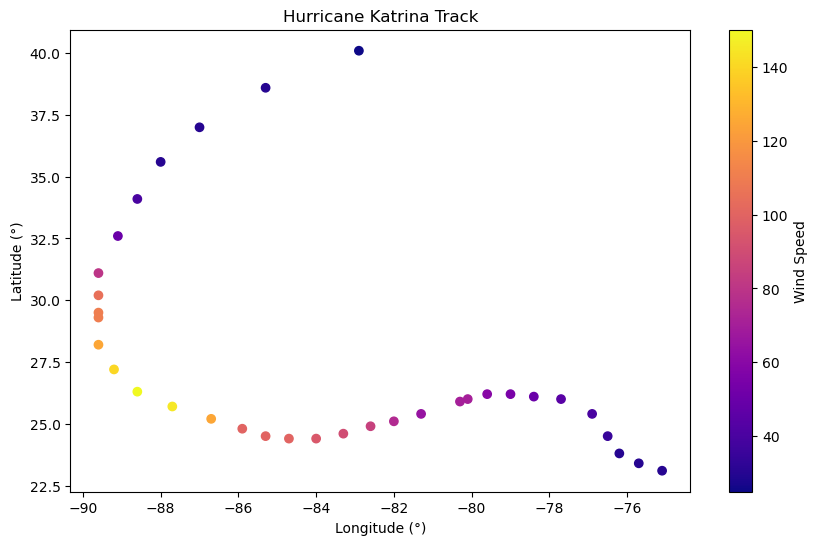

In [25]:
katrina_SID = katrina['SID'].iloc[0]
gb = df.groupby('SID')
katrina_group = gb.get_group(katrina_SID)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(katrina['LON'], katrina['LAT'], c=katrina['WIND'], cmap='plasma')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.colorbar(scatter, label='Wind Speed')
plt.title('Hurricane Katrina Track')

### 10) Make time the index on your dataframe

In [72]:
katrina_group = katrina_group.set_index(pd.to_datetime(katrina_group['ISO_TIME']))
katrina_group

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,,
2005-08-23 18:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1,-75.1,30.0,1008.0
2005-08-23 21:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2,-75.4,NaN,NaN
2005-08-24 00:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4,-75.7,30.0,1007.0
2005-08-24 03:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.6,-76.0,NaN,NaN
2005-08-24 06:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8,-76.2,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-30 18:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0,-87.0,30.0,990.0
2005-08-30 21:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.8,-86.3,NaN,NaN
2005-08-31 00:00:00,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6,-85.3,30.0,994.0


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

/tmp/ipykernel_377/845065644.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time.resample('Y').size().plot(figsize=(12, 6), kind='line', marker='o', markersize=3, linewidth=1, color = 'navy', grid = 'True', title='Number of Hurricane Datapoints Per Year', xlabel='Year', ylabel='Counts')


<Axes: title={'center': 'Number of Hurricane Datapoints Per Year'}, xlabel='Year', ylabel='Counts'>

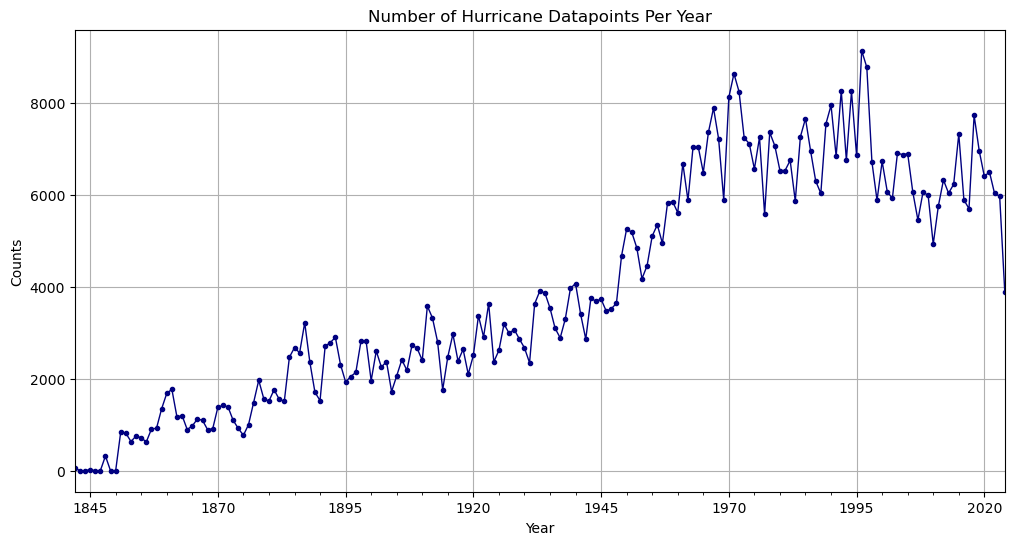

In [80]:
df_time = df.set_index(pd.to_datetime(df['ISO_TIME']))
df_time.resample('Y').size().plot(figsize=(12, 6), kind='line', marker='o', markersize=3, linewidth=1, color = 'navy', grid = 'True', title='Number of Hurricane Datapoints Per Year', xlabel='Year', ylabel='Counts')

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

Text(0.5, 1.0, 'North Atlantic Hurricane Tracks in 2005')

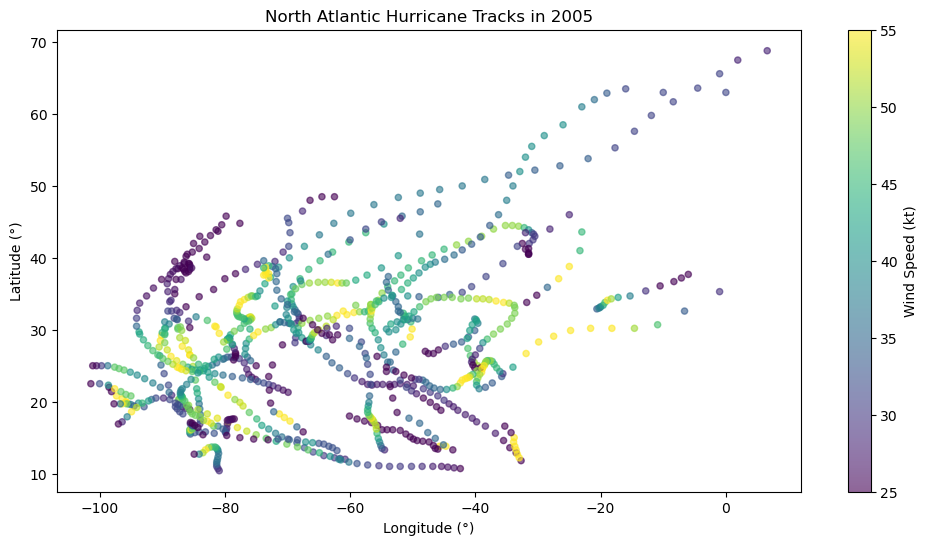

In [45]:
NAin2005 = df[(df['BASIN'] == 'NA') & (df['SEASON'] == 2005)]
plt.figure(figsize=(12, 6))

for sid, storm in NAin2005.groupby('SID'):
    plt.scatter(storm['LON'], storm['LAT'], c=storm['WIND'], cmap='viridis', s=20, alpha=0.6)
plt.colorbar(label='Wind Speed (kt)')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('North Atlantic Hurricane Tracks in 2005')

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [48]:
NAfrom1970 = df[(df['BASIN'] == 'NA') & (df['SEASON'] >= 1970)]
NAfrom1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
347170,1970138N12281,1970,35,NA,CS,ALMA,1970-05-17 18:00:00,TS,11.5,-79.0,25.0,NaN
347171,1970138N12281,1970,35,NA,CS,ALMA,1970-05-17 21:00:00,TS,11.6,-79.1,NaN,NaN
347172,1970138N12281,1970,35,NA,CS,ALMA,1970-05-18 00:00:00,TS,11.8,-79.3,25.0,NaN
347173,1970138N12281,1970,35,NA,CS,ALMA,1970-05-18 03:00:00,TS,12.0,-79.5,NaN,NaN
347174,1970138N12281,1970,35,NA,CS,ALMA,1970-05-18 06:00:00,TS,12.1,-79.7,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715301,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,2024-10-20 03:00:00,TS,17.1,-90.6,NaN,NaN
715302,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,2024-10-20 06:00:00,TS,17.0,-91.2,NaN,NaN
715303,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,2024-10-20 09:00:00,TS,16.9,-91.9,NaN,NaN
715304,2024291N14279,2024,74,NA,NA,KRISTY:NADINE,2024-10-20 12:00:00,DS,16.8,-92.8,NaN,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

<Axes: title={'center': 'Number of Hurricane Datapoints Per Day (since 1970)'}, xlabel='Year', ylabel='Count'>

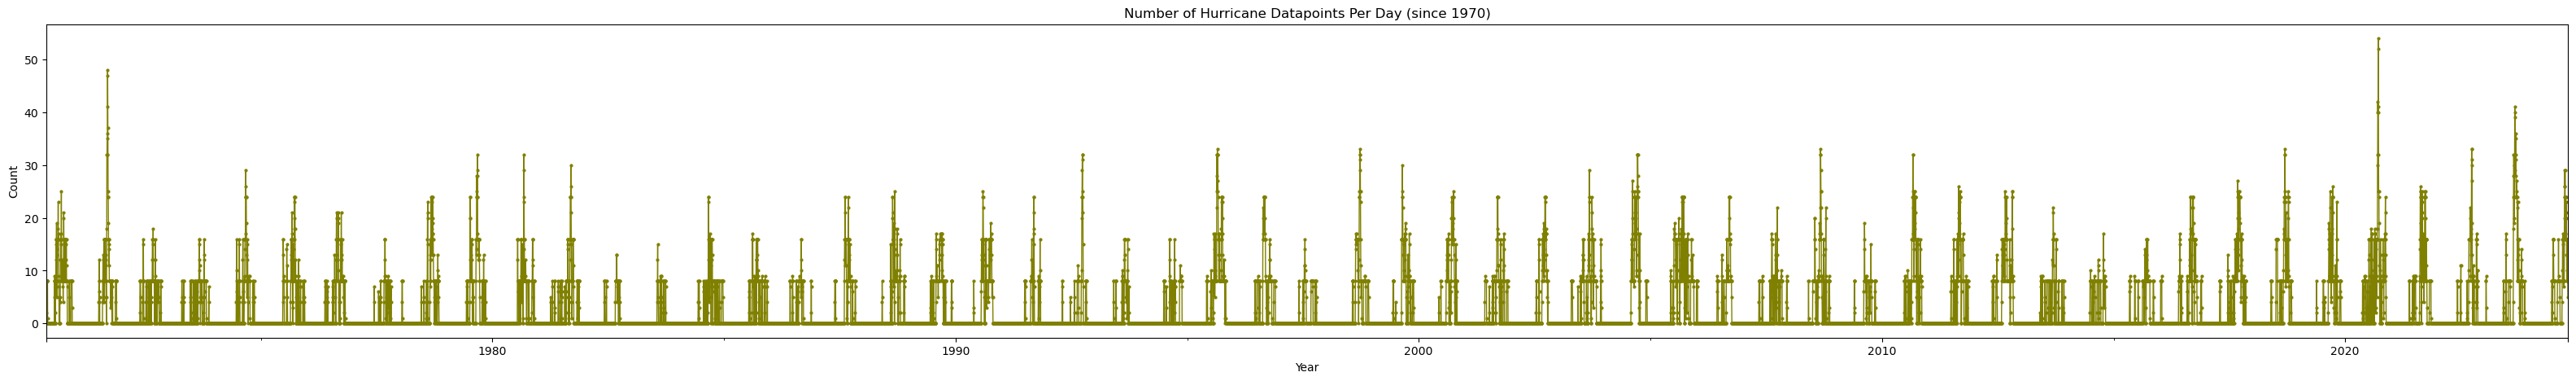

In [49]:
na_recent_time = NAfrom1970.set_index(pd.to_datetime(NAfrom1970['ISO_TIME']))
na_recent_time.resample('D').size().plot(figsize=(40, 5), marker='o', markersize=2, linewidth=1, xlabel='Year', ylabel='Count', color= 'olive', title = 'Number of Hurricane Datapoints Per Day (since 1970)')

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

In [50]:
NA_climatology = na_recent_time.groupby(na_recent_time.index.dayofyear).aggregate({
    'WIND': ['mean','std']
})

<Axes: title={'center': 'North Atlantic Hurricane Climatology since 1970'}, xlabel='Day of Year'>

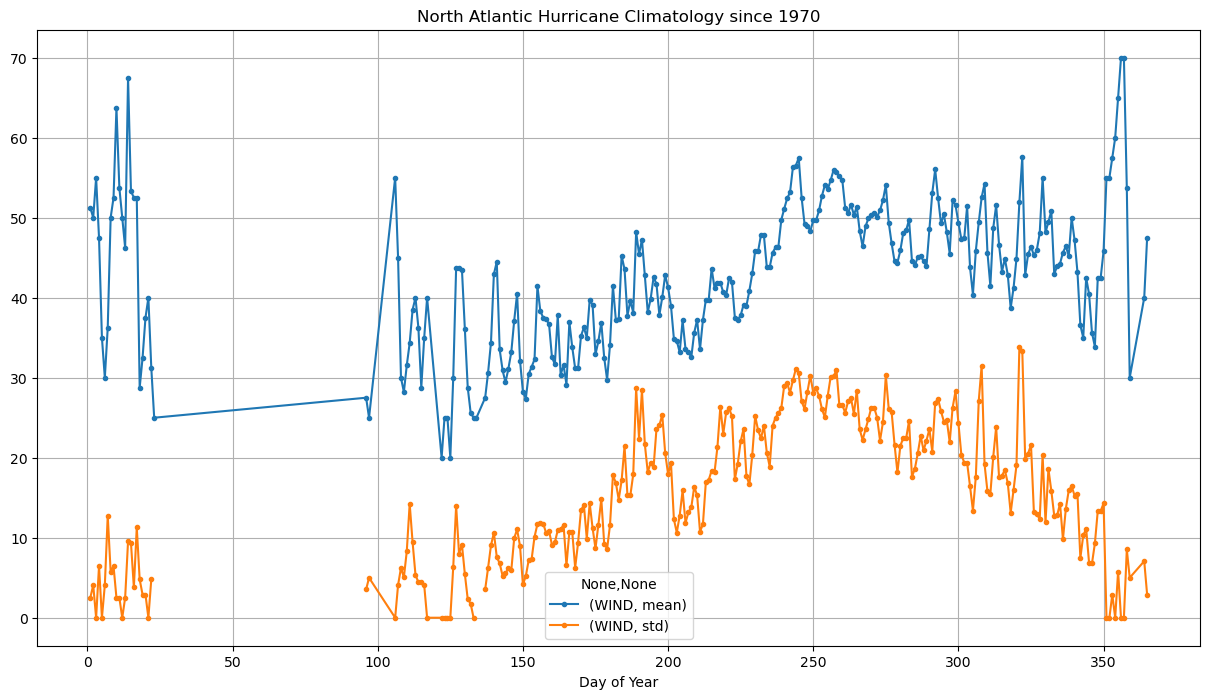

In [51]:
NA_climatology.plot(figsize=(15, 8), marker='.', xlabel='Day of Year', title='North Atlantic Hurricane Climatology since 1970', grid='true')

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

In [52]:
daily_counts = na_recent_time.resample('D').size()
daily_counts

ISO_TIME
1970-05-17     2
1970-05-18     8
1970-05-19     8
1970-05-20     8
1970-05-21     8
              ..
2024-10-18    16
2024-10-19    16
2024-10-20    14
2024-10-21     8
2024-10-22     5
Freq: D, Length: 19883, dtype: int64

/tmp/ipykernel_409/4121766451.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  count_anomalies.resample('Y').mean().plot(marker='o', linewidth=2, markersize=8, ylabel = 'standardized anomalies', color= 'chocolate', grid = 'true')


Text(0.5, 1.0, 'Annual Hurricane Count Anomalies ofNorth Atlantic (since 1970)')

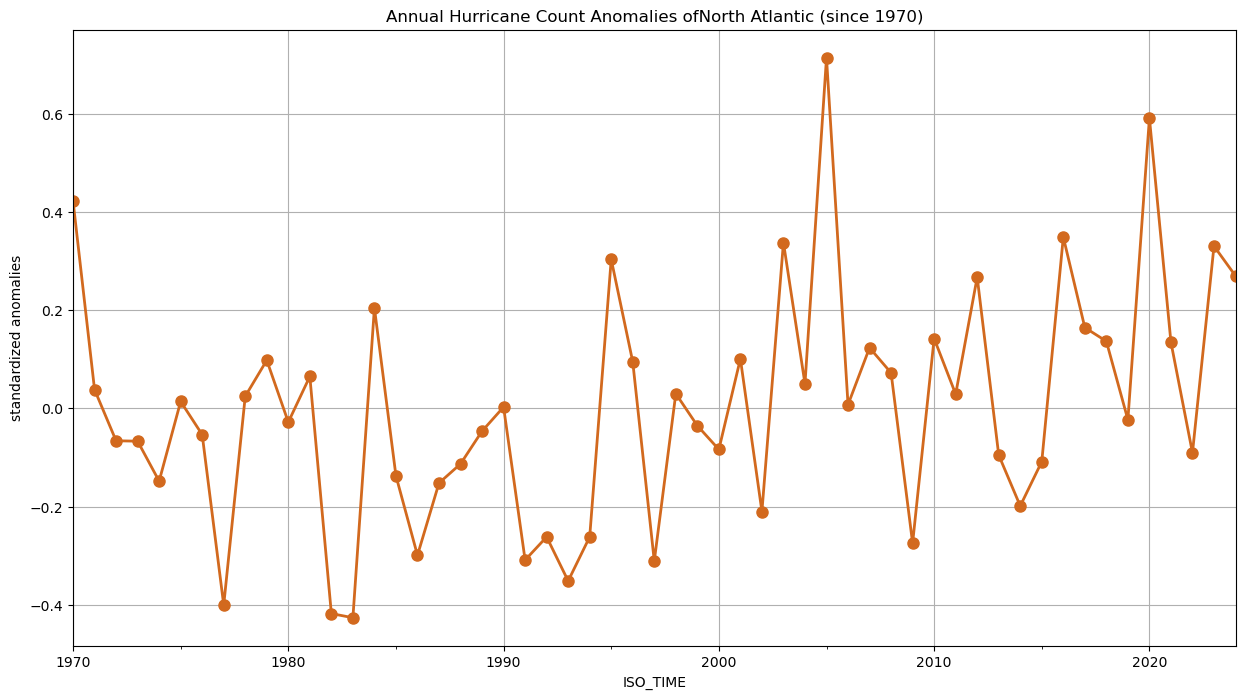

In [54]:
def standardize(x):
    return (x - x.mean())/x.std()
count_anomalies = daily_counts.groupby(daily_counts.index.dayofyear).transform(standardize)
plt.figure(figsize=(15, 8))
count_anomalies.resample('Y').mean().plot(marker='o', linewidth=2, markersize=8, ylabel = 'standardized anomalies', color= 'chocolate', grid = 'true')
plt.title('Annual Hurricane Count Anomalies ofNorth Atlantic (since 1970)')

Which years stand out as having anomalous hurricane activity?

Most active years: in 2005, 1970, 2020
in 2017-2018: the standard deviation is around 0.3
and in the early 1990s, the anomalies are the least active.